In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
# school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
mouse_trial_complete = pd.merge(mouse_data_df, trial_data_df, how = "outer", on = ["Mouse ID"])
# Display the data table for preview

mouse_trial_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumorData = mouse_trial_complete.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# meanTumorData = meanTumorData.reset_index()
# Convert to DataFrame
meanTumorDF = pd.DataFrame(meanTumorData)
# Preview DataFrame
meanTumorDFU = meanTumorDF.unstack(level=0)
meanTumorDFU# = meanTumorDFU.reset_index()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
err = mouse_trial_complete.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
error_df = pd.DataFrame(err)
# Preview DataFrame

error_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
errorDFU = error_df.unstack(level=0)

# Preview that Reformatting worked
errorDFU

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   
25                  0.881642  0.439356  0.550315  0.755413  0.813706   
30                  0.934460  0.490620  0.631061  0.934121  0.975496   
35                  1.052241  0.692248  0.984155  1.127867  1.013769   
40                  1.223608  0.708505  1.055220  1.158449  1.118567   
45                  1.223977  0.902358  1.144427  1.453186  1.416363   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182  
25         1.034872  0.577401  0.746991  0.741922  0.602513  
30         1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.351726  1.888586  1.226805  1.576556  1.003576

In [6]:
x_axis = np.arange( 0, 50,5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [7]:
drugsIndex = meanTumorDFU['Tumor Volume (mm3)'].columns 
lessDrugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

<Container object of 3 artists>

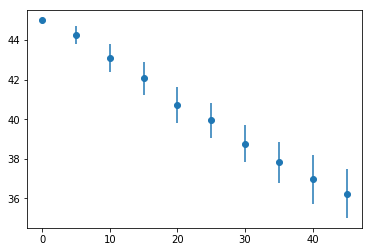

In [8]:
# Generate the Plot (with Error Bars)
y_axis = meanTumorDFU['Tumor Volume (mm3)']['Capomulin']
fig, ax = plt.subplots()
ax.errorbar(x_axis, y_axis, yerr = errorDFU['Tumor Volume (mm3)']['Capomulin'], fmt ='o')
#df.plot(kind='scatter', x='x', y='y', xerr=err_df, ax=axes[1], title='xerr')
#plt.xticks( site2['Cl'], site2.index.values ) # location, labels
# temp, xAxis = plt.xticks(meanTumorDFU, meanTumorDFU.index)
# y_axis = meanTumorDFU['Tumor Volume (mm3)']['Capomulin']
# meanTumorDFU.plot(kind='scatter', x = 'Timepoint', y=meanTumorDFU['Tumor Volume (mm3)']['Capomulin'])
# Save the Figure
# y_axis


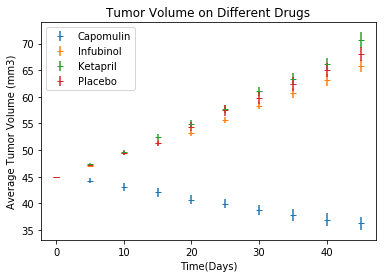

In [9]:
fig, ax = plt.subplots()
for d in lessDrugs:
    y_axis = meanTumorDFU['Tumor Volume (mm3)'][d]
    yerr = errorDFU['Tumor Volume (mm3)'][d]
    ax.errorbar(x_axis, y_axis, yerr = yerr, fmt = '_', label=d)
ax.legend(loc = 'upper left')
# ax.set(xlim=(-5, 46), ylim=(30, 100))
# plt.figure(figsize = [5,3])
plt.title("Tumor Volume on Different Drugs")
plt.xlabel("Time(Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("treatment.png")
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanMetaData = mouse_trial_complete.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
meanMetaDF = pd.DataFrame(meanMetaData)
meanMetaDFU = meanMetaDF.unstack(level=0)
meanMetaDFU


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
err2 = mouse_trial_complete.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
semMetaDF = pd.DataFrame(err2)
# Preview DataFrame
semMetaDF.reset_index()
semMetaDF.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
semMetaDFU = semMetaDF.unstack(level = 0)
# Preview that Reformatting worked
semMetaDFU

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25                0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30                0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35                0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40                0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45                0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

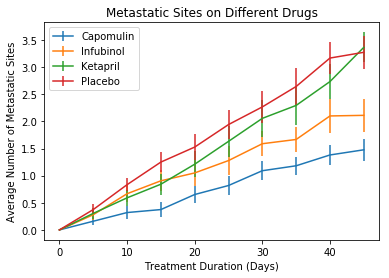

In [13]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
for d in lessDrugs:
    y_axis = meanMetaDFU['Metastatic Sites'][d]
    yerr = semMetaDFU['Metastatic Sites'][d]
    ax.errorbar(x_axis, y_axis, yerr = yerr, label=d)
ax.legend(loc='upper left')
plt.title("Metastatic Sites on Different Drugs")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Average Number of Metastatic Sites")
# Save the Figure
plt.savefig("spread.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MouseCount = mouse_trial_complete.groupby(['Drug','Timepoint'])['Drug'].count()
# Convert to DataFrame
MouseCountDF = pd.DataFrame(MouseCount)
# Preview DataFrame
MouseCountDF['Mouse Count'] = MouseCountDF['Drug']
MouseCount2 = MouseCountDF.drop(['Drug'], axis = 1)
# MouseCount2 = MouseCount2.reset_index()
MouseCount2.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [15]:
# Minor Data Munging to Re-Format the Data Frames
MouseCountU = MouseCount2.unstack(level=0)
# MouseCountU = MouseCountU.reorder_levels()
# Preview the Data Frame
MouseCountU

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

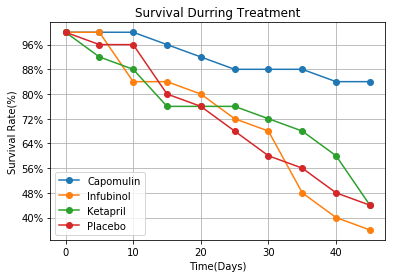

In [16]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
for d in lessDrugs:
    y_axis = MouseCountU['Mouse Count'][d]
#     ax.scatter(x_axis, y_axis, label = d, linewidths = 5)
    ax.plot(x_axis, y_axis, '-o')
ax.legend(loc='lower left')
plt.gca().set_yticklabels(['{:.0f}%'.format(x/45*180) for x in plt.gca().get_yticks()]) 
#above feels wrong, 180 just seemed to get it where I wanted it, instead of weird other numbers
plt.grid()
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival Durring Treatment")
# Save the Figure
plt.savefig("survival.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
percentChangeList = []

In [18]:
# Calculate the percent changes for each drug ( total % tumor volume change)

for d in drugsIndex:
    dataTuple = ( d , 100*(meanTumorDFU['Tumor Volume (mm3)'][d][45] - meanTumorDFU['Tumor Volume (mm3)'][d][0])/meanTumorDFU['Tumor Volume (mm3)'][d][0])
    percentChangeList.append(dataTuple)
    print(dataTuple)
# Display the data to confirm
print(percentChangeList)
#Looking at what needs to be done here, this may not be the best storage system.

('Capomulin', -19.475302667894173)
('Ceftamin', 42.516491855897442)
('Infubinol', 46.123471727851879)
('Ketapril', 57.028794686606076)
('Naftisol', 53.92334713476923)
('Placebo', 51.297960483151527)
('Propriva', 47.241174863206368)
('Ramicane', -22.320900462766673)
('Stelasyn', 52.085134287899031)
('Zoniferol', 46.579750865095249)
[('Capomulin', -19.475302667894173), ('Ceftamin', 42.516491855897442), ('Infubinol', 46.123471727851879), ('Ketapril', 57.028794686606076), ('Naftisol', 53.92334713476923), ('Placebo', 51.297960483151527), ('Propriva', 47.241174863206368), ('Ramicane', -22.320900462766673), ('Stelasyn', 52.085134287899031), ('Zoniferol', 46.579750865095249)]


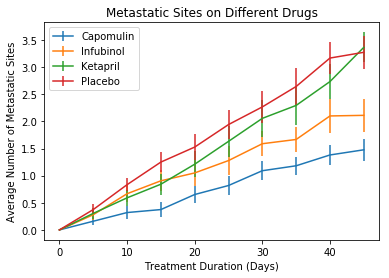

In [19]:
fig, ax = plt.subplots()
for d in lessDrugs:
    y_axis = meanMetaDFU['Metastatic Sites'][d]
    yerr = semMetaDFU['Metastatic Sites'][d]
    ax.errorbar(x_axis, y_axis, yerr = yerr, label=d)
ax.legend(loc='upper left')
plt.title("Metastatic Sites on Different Drugs")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Average Number of Metastatic Sites")
# Save the Figure
plt.savefig("spread.png")
# Show the Figure
plt.show()

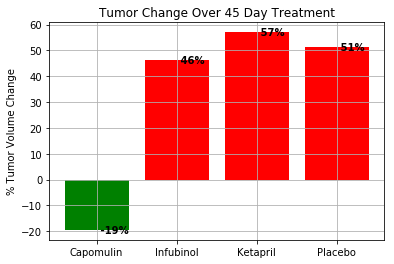

In [43]:
# Store all Relevant Percent Changes into a Tuple
fig , ax = plt.subplots()

tickLabel = []
tickValue = []
#Below is why I don't think I stored things optimally
for d in lessDrugs:
    for x in percentChangeList:
        if ( x[0] == d ):
#             print(x[0])
            tickLabel.append(x[0])
            tickValue.append(x[1])
            
# print(tickValue)
x_axis = np.arange(len(tickLabel))
colorList = []
for x in tickValue:
    if x > 0:
        colorList.append('r')
    else:
        colorList.append('g')
ax.bar(x_axis, tickValue, color = colorList)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel('% Tumor Volume Change')
plt.xticks(np.arange(4),tickLabel)
plt.grid()
for v,i in enumerate(tickValue):
    plt.text(v,i, " "+str(int(tickValue[v]))+"%", va = 'center', fontweight = 'bold')
# plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
# Splice the data between passing and failing drugs
# Save the Figure
plt.savefig("change.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)